In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("credit_risk_dataset.csv")
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
dataset["loan_status"].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [5]:
dataset.info()
dataset.isnull().sum()
dataset['person_emp_length'].fillna(dataset['person_emp_length'].mean(),inplace=True)
dataset['loan_int_rate'].fillna(dataset['loan_int_rate'].mean(),inplace=True)
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


C:\Users\akshi\AppData\Local\Temp\ipykernel_27444\4238035933.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['person_emp_length'].fillna(dataset['person_emp_length'].mean(),inplace=True)
C:\Users\akshi\AppData\Local\Temp\ipykernel_27444\4238035933.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [6]:
df=pd.get_dummies(dataset,columns=["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"])

In [7]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True


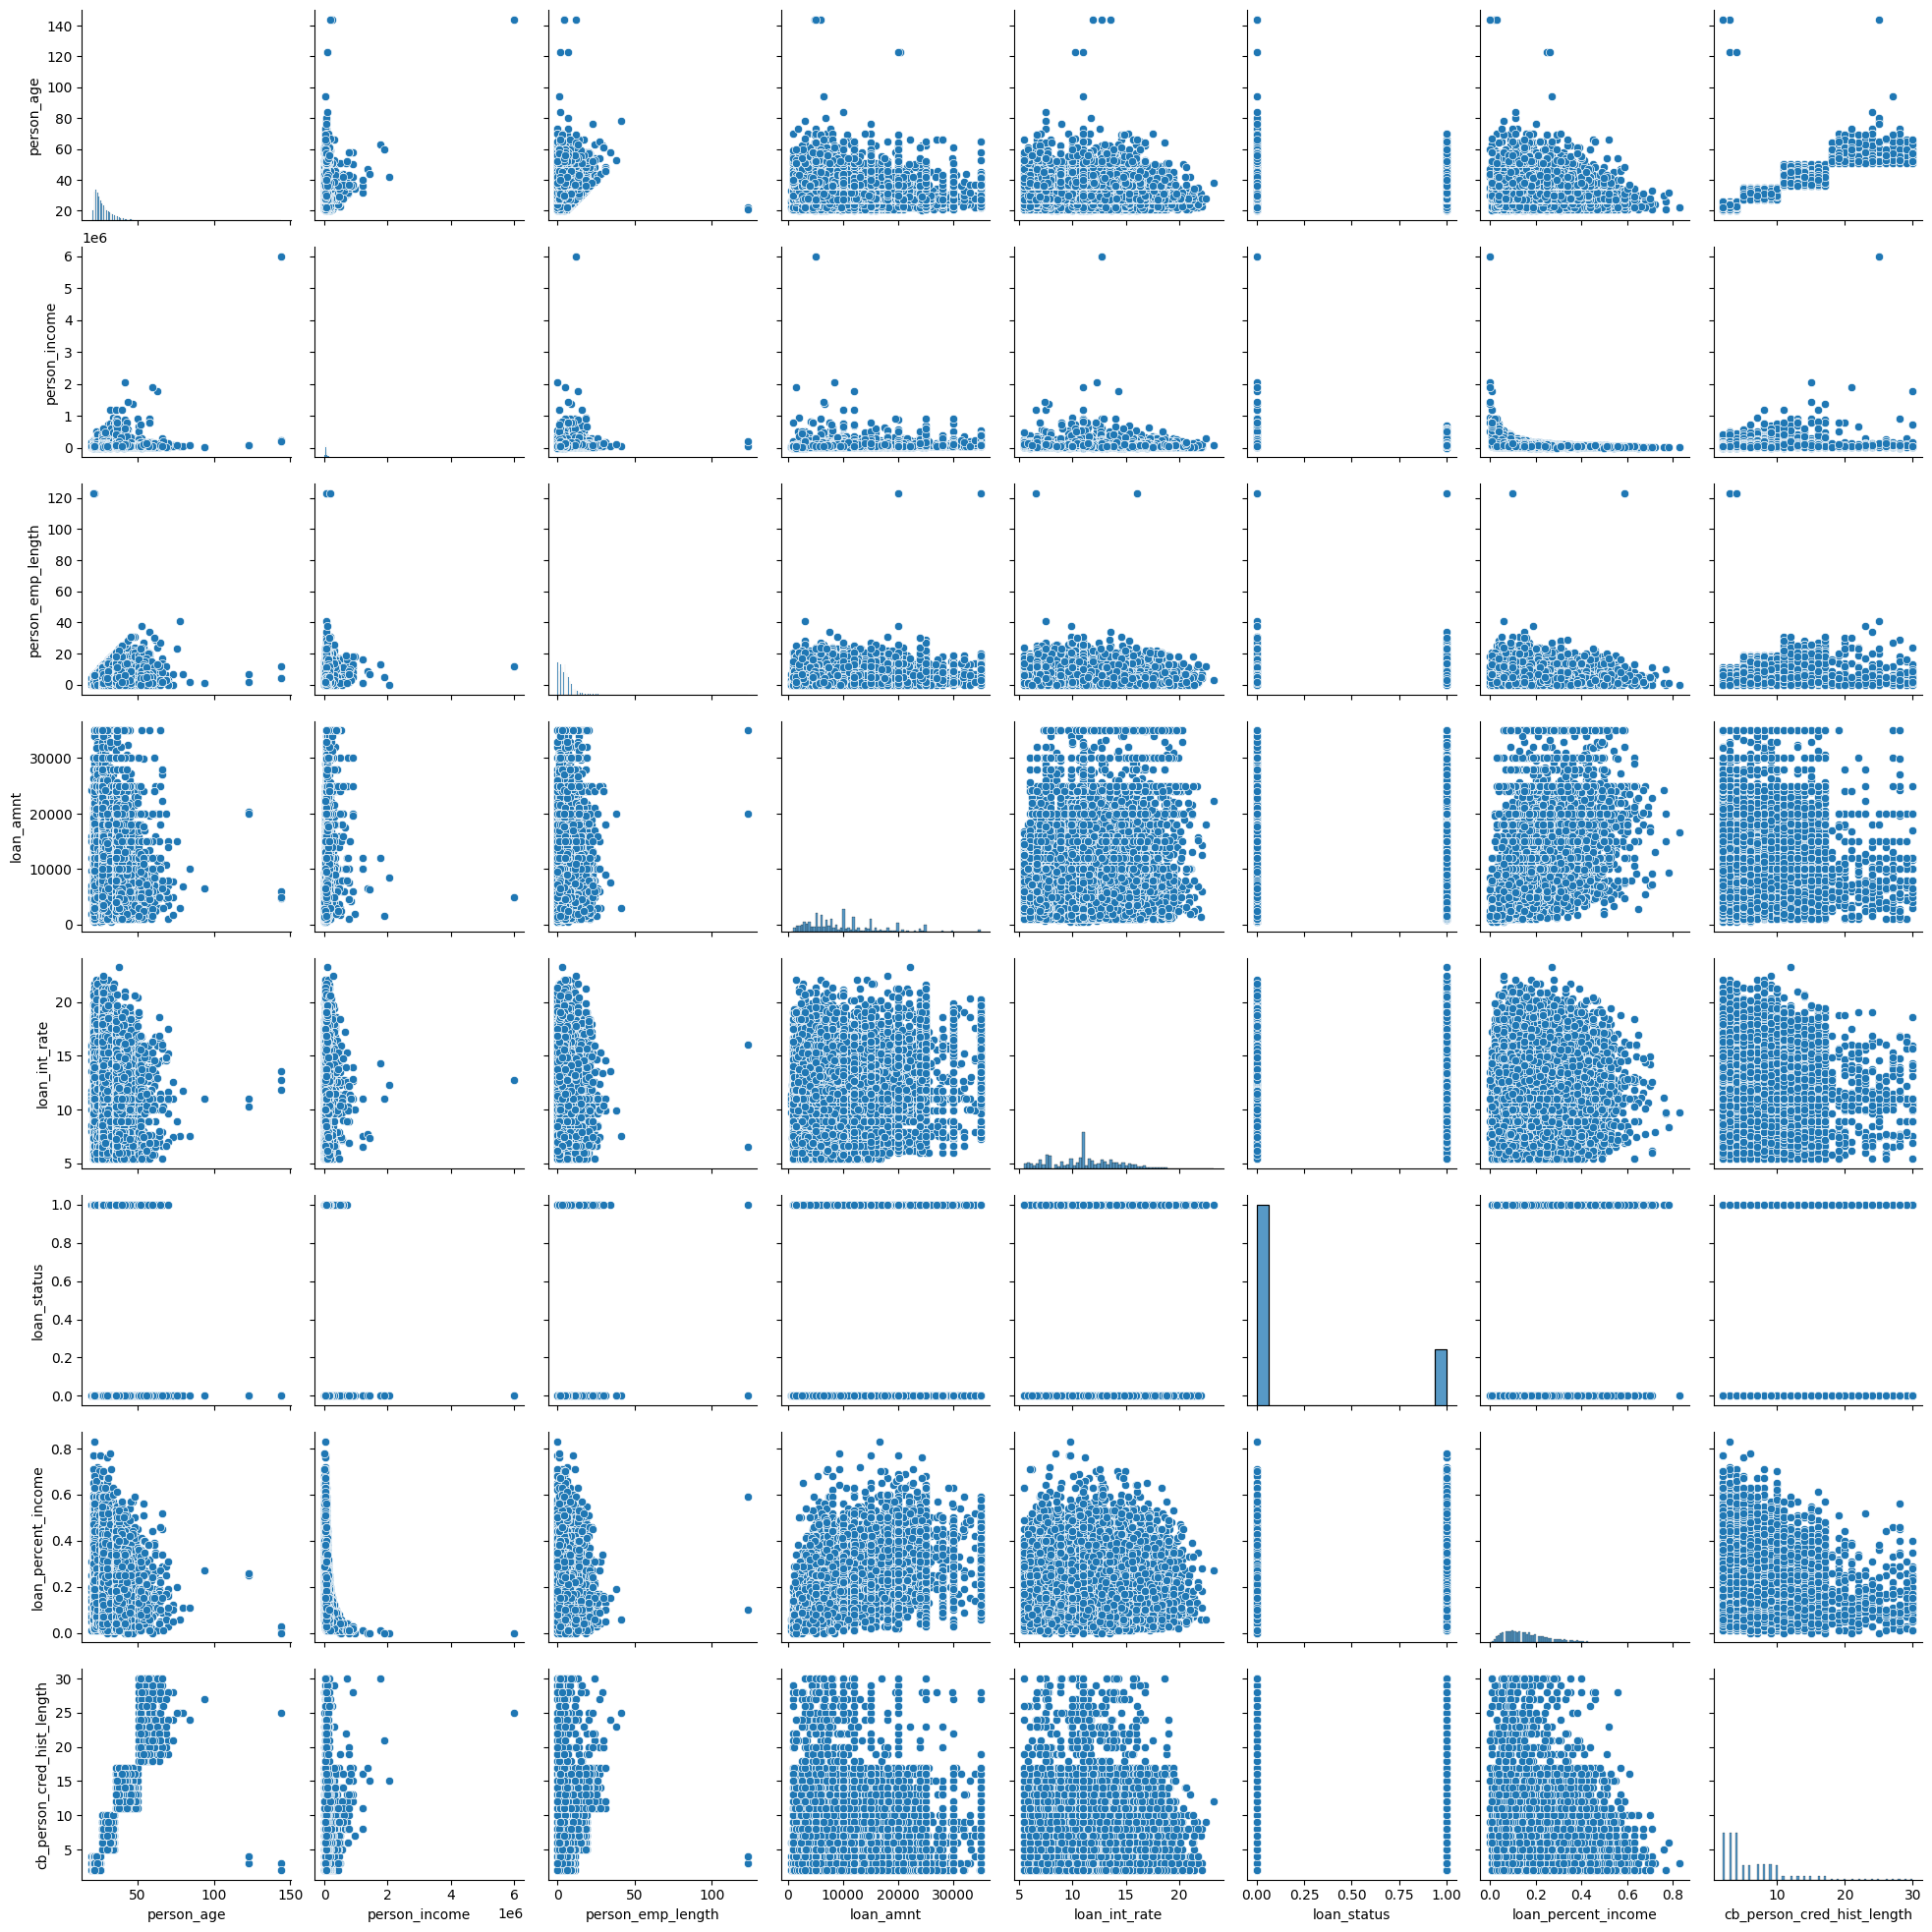

In [8]:
sns.pairplot(data=dataset)
plt.show()

In [9]:
x=df.drop('loan_status',axis=1)
y=df["loan_status"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier();
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
train_acc=tree.score(x_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
print("Train Accuracy: ",train_acc)
print("Test Accuracy: ",test_acc)

Train Accuracy:  1.0
Test Accuracy:  0.8887797692118832


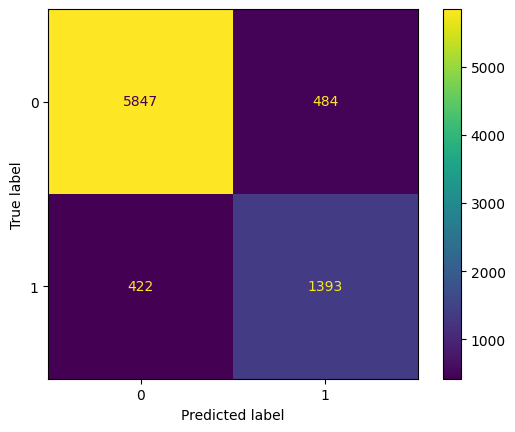

In [12]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)
print('Training accuracy: ',rf.score(x_train,y_train))
print('Test Accuracy: ',accuracy_score(y_test,y_pred1))

Training accuracy:  1.0
Test Accuracy:  0.9332187576724773


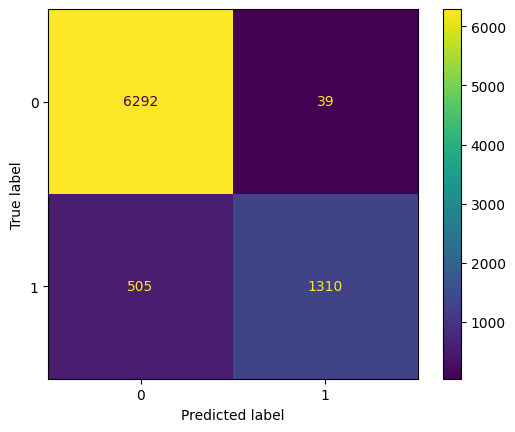

In [14]:
cm1=confusion_matrix(y_test,y_pred1)
ConfusionMatrixDisplay(confusion_matrix=cm1).plot()

In [15]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("Training Accuracy:",xgb.score(x_train,y_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred))

C:\Users\akshi\anaconda3\envs\ML_Practice\lib\site-packages\xgboost\training.py:199: UserWarning: [16:12:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy: 0.9575199508901167
Test Accuracy: 0.9365332678615271


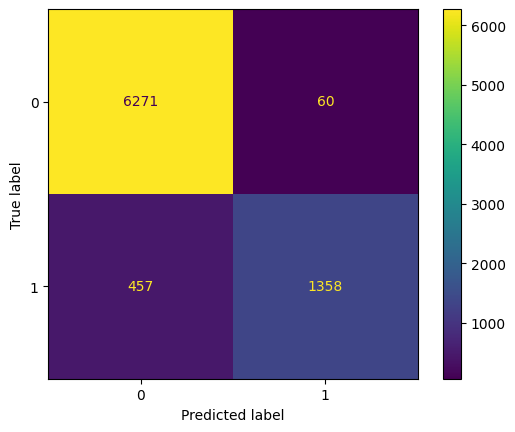

In [16]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()